In [184]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [185]:
df=pd.read_csv('homepricesMulti.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000
6,4300,3.0,20,700000
7,3500,2.0,25,550000
8,4200,5.0,27,790000
9,4500,4.0,23,820000


In [186]:
df.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [187]:
df.describe()

,area,bedrooms,age,price
count,15.000000,14.000000,15.000000,15.000000
mean,4106.666667,4.500000,22.466667,749400.000000
std,784.188996,1.344504,7.927048,142340.035529
min,2600.000000,2.000000,8.000000,550000.000000
25%,3550.000000,3.250000,19.000000,602500.000000
50%,4200.000000,5.000000,23.000000,790000.000000
75%,4750.000000,5.750000,28.500000,873000.000000
max,5200.000000,6.000000,35.000000,930000.000000


<AxesSubplot:>

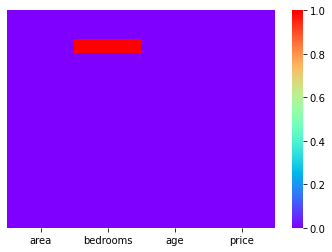

In [188]:
sns.heatmap(df.isna(),yticklabels=False,cmap='rainbow')

<AxesSubplot:xlabel='bedrooms'>

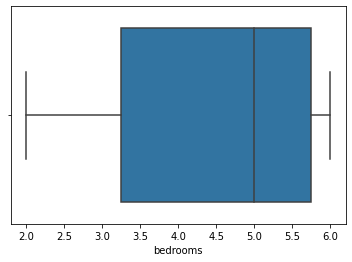

In [189]:
sns.boxplot(x='bedrooms',data=df)

In [190]:
median_bedrooms=math.floor(df['bedrooms'].median())
median_bedrooms

5

In [191]:
df['bedrooms']=df['bedrooms'].fillna(median_bedrooms)

In [192]:
X=df[['area','bedrooms','age']]
y=df[['price']]

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [194]:
multi_reg=LinearRegression()

In [195]:
multi_reg.fit(X_train,y_train)

LinearRegression()

In [196]:
multi_reg.coef_

array([[  124.76372162, 38233.93865886,   617.70413295]])

In [197]:
multi_reg.intercept_

array([55259.06748935])

In [198]:
predictions=multi_reg.predict(X_test)
predictions

array([[927012.43153677],
       [637641.40529057],
       [591751.5489825 ]])

In [199]:
metrics.r2_score(y_test,predictions)

0.9644167405286544